<a href="https://colab.research.google.com/github/doldolMac/homework_CV/blob/master/CV_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/doldolMac/homework_CV

Cloning into 'homework_CV'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 102 (delta 15), reused 0 (delta 0), pack-reused 58
Receiving objects: 100% (102/102), 4.57 MiB | 6.58 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [0]:
# 이미지 및 크기 정보 불러오기
from skimage import io
from skimage import color
from PIL import Image

img_1_ori = io.imread('/content/homework_CV/Telescope.jpg')
img_2_ori = io.imread('/content/homework_CV/Telescope_rot.jpg')
img_3_ori = io.imread('/content/homework_CV/Telescope_illu.jpeg')
img_4_ori = io.imread('/content/homework_CV/Telescope_scale.jpg')


img_1 = color.rgb2gray(img_1_ori)
img_2 = color.rgb2gray(img_2_ori)
img_3 = color.rgb2gray(img_3_ori)
img_4 = color.rgb2gray(img_4_ori)



img_1_copy = img_1.copy()
img_2_copy = img_2.copy()
img_3_copy = img_3.copy()
img_4_copy = img_4.copy()

In [0]:
# Gaussian 커널 형성
import numpy as np

def gaussian_kernel(size, sigma=1):
  size = int(size) //2
  x, y = np.mgrid[-size:size+1, -size:size+1]
  normal =1 / (2.0 * np.pi * sigma**2)
  gaussian = np.exp(-((x**2 + y**2) / (2.0*sigma**2) * normal))
  return gaussian

#1.HarrisCornerDetector

## 1.1 get_interest_point()

In [0]:
from matplotlib import pyplot as plt
from scipy import signal
from scipy import ndimage

def HarrisCornerDetector(img, Window_size, height, width, offset):

  list_x = []
  list_y = []
  M = np.zeros((height, width), np.float32)

  def sobel_filters(img):

    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

    Ix = ndimage.filters.convolve(img,kernel_x) # x축 방향 기울기
    Iy = ndimage.filters.convolve(img,kernel_y) # y축 방향 기울기

    G = np.hypot(Ix, Iy)  #Gradient 값
    G = G / G.max()*255   #Gradient Normalization
    theta = (np.arctan2(Iy, Ix))*180/np.pi  #Theta값

    Ixx = Ix**2
    Ixy = Iy*Ix
    Iyy = Iy**2

    return (G, theta, Ixx, Iyy, Ixy)

  G, theta, Ixx, Iyy, Ixy = sobel_filters(img)

  Gaussian_Kernel = gaussian_kernel(5, 1.4)
  Gaussian_Ixx = signal.convolve2d(Ixx, Gaussian_Kernel, mode='same')
  Gaussian_Iyy = signal.convolve2d(Iyy, Gaussian_Kernel, mode='same')
  Gaussian_Ixy = signal.convolve2d(Ixy, Gaussian_Kernel, mode='same')


  # 엣지가 아닌 코너점 검출
  for y in range(window_size, height-window_size):
    for x in range(window_size, width-window_size):
      Sxx = np.sum(Gaussian_Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
      Syy = np.sum(Gaussian_Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
      Sxy = np.sum(Gaussian_Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
    
      det = (Sxx * Syy) - (Sxy**2)
      trace = Sxx + Syy
      M[y,x] = det - k*(trace**2)

  thresh = 0.5 * M.max()

  for y in range(window_size, height-window_size):
    for x in range(window_size, width-window_size):
      Sxx = np.sum(Gaussian_Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
      Syy = np.sum(Gaussian_Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
      Sxy = np.sum(Gaussian_Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
    
      det = (Sxx * Syy) - (Sxy**2)
      trace = Sxx + Syy
      M[y,x] = det - k*(trace**2)

      if M[y,x] > thresh:
        list_y.append(y)
        list_x.append(x)
  
  _, ax = plt.subplots(1, 1) 
  ax.imshow(img)
  ax.scatter(list_x, list_y, s=25, facecolors='r', edgecolors='r', alpha=0.8)

  return list_y, list_x, theta

plt.show()

## 1.2 HarrisCornerDetector을 이용한 코너의 검출(원본이미지)

47


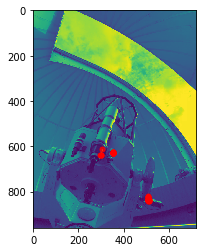

In [7]:
height1 = img_1.shape[0]
width1 = img_1.shape[1]
k = 0.04
window_size = 5
offset = window_size // 2

list_y1, list_x1, theta1 = HarrisCornerDetector(img_1, window_size, height1, width1, offset)
print(len(list_x1))

plt.show()

## 1.3 HarrisCornerDetector을 이용한 코너의 검출(회전이미지)

45


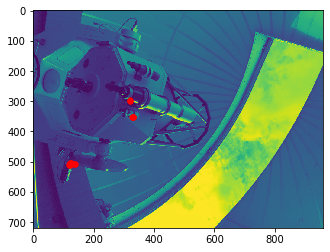

In [8]:
height2 = img_2.shape[0]
width2= img_2.shape[1]
k = 0.04
window_size = 5
offset = window_size // 2

list_y2, list_x2, theta2 =HarrisCornerDetector(img_2, window_size, height2, width2, offset)
print(len(list_x2))

plt.show()

## 1.3 HarrisCornerDetector을 이용한 코너의 검출(밝기변화이미지)




196


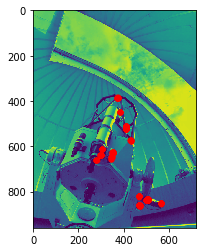

In [10]:
height3 = img_3.shape[0]
width3= img_3.shape[1]
k = 0.04
window_size = 5
offset = window_size // 2

list_y3, list_x3, theta3 =HarrisCornerDetector(img_3, window_size, height3, width3, offset)
print(len(list_x3))

plt.show()

## 1.3 HarrisCornerDetector을 이용한 코너의 검출(밝기변화이미지)

40


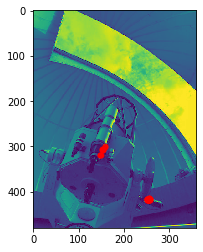

In [12]:
height4 = img_3.shape[0]
width4= img_3.shape[1]
k = 0.04
window_size = 5
offset = window_size // 2

list_y3, list_x3, theta3 =HarrisCornerDetector(img_4, window_size, height4, width4, offset)
print(len(list_x3))

plt.show()

#2.SIFT-like Local Feature

## 2.1 get_features()

In [0]:
import numpy as np2

def get_features(list_x, list_y, theta):
  # Window_list : Orientation 정보를 담고 있는 Key Point 주변부의 16x16 윈도우를 리스트에 저장
  Window= np.zeros((16,16), np.float32)
  Window_list = []
  for itr in range(0, len(list_y)):
    #KeyPoint의 그래디언트를 빼주어 정규화
    gradKey = theta[list_y[itr], list_x[itr]]
    #16X16 사이즈의 윈도우를 형성
    for i in range(0,16):
      for j in range(0,16):
        Window[i,j] = theta[list_y[itr]-8+i, list_x[itr]-8+j]-gradKey+360
    #16x16 사이즈의 윈도우를 리스트로 저장
    Window_list.append(Window)

  #Subwindow(4X4) 형성
  def get_Subwindow_list(Window_list):
    Subwindow1 = np.zeros((4,4), np.float32)
    Subwindow2 = np.zeros((4,4), np.float32)
    Subwindow3 = np.zeros((4,4), np.float32)
    Subwindow4 = np.zeros((4,4), np.float32)
    Subwindow5 = np.zeros((4,4), np.float32)
    Subwindow6 = np.zeros((4,4), np.float32)
    Subwindow7 = np.zeros((4,4), np.float32)
    Subwindow8 = np.zeros((4,4), np.float32)
    Subwindow9 = np.zeros((4,4), np.float32)
    Subwindow10 = np.zeros((4,4), np.float32)
    Subwindow11 = np.zeros((4,4), np.float32)
    Subwindow12 = np.zeros((4,4), np.float32)
    Subwindow13 = np.zeros((4,4), np.float32)
    Subwindow14 = np.zeros((4,4), np.float32)
    Subwindow15 = np.zeros((4,4), np.float32)
    Subwindow16 = np.zeros((4,4), np.float32)
    Subwindow_list1 = []
    Subwindow_list2 = []
    Subwindow_list3 = []
    Subwindow_list4 = []
    Subwindow_list5 = []
    Subwindow_list6 = []
    Subwindow_list7 = []
    Subwindow_list8 = []
    Subwindow_list9 = []
    Subwindow_list10 = []
    Subwindow_list11 = []
    Subwindow_list12 = []
    Subwindow_list13 = []
    Subwindow_list14 = []
    Subwindow_list15 = []
    Subwindow_list16 = []

    # Subwindow#: KeyPoint 에 따른 Subwindow 리스트 형성
    # len(Window_list): Keypoint의 개수
    for i in range(0,len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          #Windowlist로부터 4X4 subwindow 행렬 생성
          Subwindow1[itr, itr2] = Window_list[i][itr, itr2]
          Subwindow2[itr, itr2] = Window_list[i][itr, itr2+4]
          Subwindow3[itr, itr2] = Window_list[i][itr, itr2+8]
          Subwindow4[itr, itr2] = Window_list[i][itr, itr2+12]
          Subwindow5[itr, itr2] = Window_list[i][itr+4, itr2]
          Subwindow6[itr, itr2] = Window_list[i][itr+4, itr2+4]
          Subwindow7[itr, itr2] = Window_list[i][itr+4, itr2+8]
          Subwindow8[itr, itr2] = Window_list[i][itr+4, itr2+12]
          Subwindow9[itr, itr2] = Window_list[i][itr+8, itr2]
          Subwindow10[itr, itr2] = Window_list[i][itr+8, itr2+4]
          Subwindow11[itr, itr2] = Window_list[i][itr+8, itr2+8]
          Subwindow12[itr, itr2] = Window_list[i][itr+8, itr2+12]
          Subwindow13[itr, itr2] = Window_list[i][itr+12, itr2]
          Subwindow14[itr, itr2] = Window_list[i][itr+12, itr2+4]
          Subwindow15[itr, itr2] = Window_list[i][itr+12, itr2+8]
          Subwindow16[itr, itr2] = Window_list[i][itr+12, itr2+12]

      #Keypoint 숫자에 따른 subwindow 행렬들을 리스트에 저장
      #e.g.) Subwindow_list1 : [1번 Keypoint의 1번 subwindow, 2번 Keypoint의 1번 subwindow,...]
      #      Subwindow_list2 : [1번 Keypoint의 2번 subwindow, 2번 Keypoint의 2번 subwindow,...]
      #      Subwindow_list3 : [1번 Keypoint의 3번 subwindow, 2번 Keypoint의 3번 subwindow,...]

      Subwindow_list1.append(Subwindow1)
      Subwindow_list2.append(Subwindow2)
      Subwindow_list3.append(Subwindow3)
      Subwindow_list4.append(Subwindow4)
      Subwindow_list5.append(Subwindow5)
      Subwindow_list6.append(Subwindow6)
      Subwindow_list7.append(Subwindow7)
      Subwindow_list8.append(Subwindow8)
      Subwindow_list9.append(Subwindow9)
      Subwindow_list10.append(Subwindow10)
      Subwindow_list11.append(Subwindow11)
      Subwindow_list12.append(Subwindow12)
      Subwindow_list13.append(Subwindow13)
      Subwindow_list14.append(Subwindow14)
      Subwindow_list15.append(Subwindow15)
      Subwindow_list16.append(Subwindow16)

    return (Subwindow_list1,Subwindow_list2,Subwindow_list3,Subwindow_list4,Subwindow_list5,Subwindow_list6,Subwindow_list7,Subwindow_list8,Subwindow_list9,Subwindow_list10,Subwindow_list11,Subwindow_list12,Subwindow_list13,Subwindow_list14,Subwindow_list15,Subwindow_list16)
    
  Subwindow_list1,Subwindow_list2,Subwindow_list3,Subwindow_list4,Subwindow_list5,Subwindow_list6,Subwindow_list7,Subwindow_list8,Subwindow_list9,Subwindow_list10,Subwindow_list11,Subwindow_list12,Subwindow_list13,Subwindow_list14,Subwindow_list15,Subwindow_list16 = get_Subwindow_list(Window_list)

 
  def get_Subwindow_bin(Subwindow_list1,Subwindow_list2,Subwindow_list3,Subwindow_list4,Subwindow_list5,Subwindow_list6,Subwindow_list7,Subwindow_list8,Subwindow_list9,Subwindow_list10,Subwindow_list11,Subwindow_list12,Subwindow_list13,Subwindow_list14,Subwindow_list15,Subwindow_list16):
    
    bins_1 = []
    bins_2 = []
    bins_3 = []
    bins_4 = []
    bins_5 = []
    bins_6 = []
    bins_7 = []
    bins_8 = []
    bins_9 = []
    bins_10 = []
    bins_11 = []
    bins_12 = []
    bins_13 = []
    bins_14 = []
    bins_15 = []
    bins_16 = []

    bins_Subwindow_1 = []
    bins_Subwindow_2 = []
    bins_Subwindow_3 = []
    bins_Subwindow_4 = []
    bins_Subwindow_5 = []
    bins_Subwindow_6 = []
    bins_Subwindow_7 = []
    bins_Subwindow_8 = []

    Subwindow_bin1 = []
    Subwindow_bin2 = []
    Subwindow_bin3 = []
    Subwindow_bin4 = []
    Subwindow_bin5 = []
    Subwindow_bin6 = []
    Subwindow_bin7 = []
    Subwindow_bin8 = []
    Subwindow_bin9 = []
    Subwindow_bin10 = []
    Subwindow_bin11 = []
    Subwindow_bin12 = []
    Subwindow_bin13 = []
    Subwindow_bin14 = []
    Subwindow_bin15 = []
    Subwindow_bin16 = []

    Bin_Subwindows = []

    len_bin_subwindow1 = []
    len_bin_subwindow2 = []
    len_bin_subwindow3 = []
    len_bin_subwindow4 = []
    len_bin_subwindow5 = []
    len_bin_subwindow6 = []
    len_bin_subwindow7 = []
    len_bin_subwindow8 = []
    len_bin_subwindow9 = []
    len_bin_subwindow10 = []
    len_bin_subwindow11 = []
    len_bin_subwindow12 = []
    len_bin_subwindow13 = []
    len_bin_subwindow14 = []
    len_bin_subwindow15 = []
    len_bin_subwindow16 = []
   

    #각 KEYPOINT 별 Subwindows들이 가지는 gradient를 순서대로 리스트화
    # gradient가 분류되어 저장될 히스토그램 형성
    # bins1 : 0~45도
    # bins2 : 45~90도
    # bins3 : 90~135도
    # bins4 : 135~180도
    # bins5 : 180~225도
    # bins6 : 225~270도
    # bins7 : 270~ 315도
    # bins8 : 315~360도

    # e.g. bin1 : 1번 Keypoint의 1번 subwindow에서 bin1의 범위를 만족하는 원소 리스트
    # bin2 : 2번 Keypoint의 2번 subwindow에서 bin2의 범위를 만족하는 원소 리스트

    # e.g. : Subwindow_list1[1][1,1] = 1번 Keypoint의 1번 subwindow에서 1,1번째 원소
    # Subwindow_list1[2][1,1] = 2번 Keypoint의 1번 subwindow에서 1,1번째 원소...
    # Subwindow_list2[3][1,1] = 3번 Keypoint의 2번 subwindow에서 1,1번째 원소...

#n번째 Keypoint의 k번 subwindow에 있는 원소 히스토그램 구하기
## 1번 subwindow 원소들의 gradient들의 개수를 저장
## 따라서, Subwindow_bin#을 이루는 원소는 16개xKeypoint 수

    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
            bins_1[itr][itr2] = Subwindow_list1[i][itr,itr2]
            bins_2[itr][itr2] = Subwindow_list2[i][itr,itr2]
            bins_3[itr][itr2] = Subwindow_list3[i][itr,itr2]
            bins_4[itr][itr2] = Subwindow_list4[i][itr,itr2]
            bins_5[itr][itr2]= Subwindow_list5[i][itr,itr2]
            bins_6[itr][itr2] = Subwindow_list6[i][itr,itr2]
            bins_7[itr][itr2] = Subwindow_list7[i][itr,itr2]
            bins_8[itr][itr2] = Subwindow_list8[i][itr,itr2]
            bins_9[itr][itr2] = Subwindow_list9[i][itr,itr2]
            bins_10[itr][itr2] = Subwindow_list10[i][itr,itr2]
            bins_11[itr][itr2] = Subwindow_list11[i][itr,itr2]
            bins_12[itr][itr2] = Subwindow_list12[i][itr,itr2]
            bins_13[itr][itr2] = Subwindow_list13[i][itr,itr2]
            bins_14[itr][itr2] = Subwindow_list14[i][itr,itr2]
            bins_15[itr][itr2] = Subwindow_list15[i][itr,itr2]
            bins_16[itr][itr2] = Subwindow_list16[i][itr,itr2]

      bins_Subwindow_1.append(len(bin1))
      bins_Subwindow_2.append(len(bin2))
      bins_Subwindow_3.append(len(bin3))
      bins_Subwindow_4.append(len(bin4))
      bins_Subwindow_5.append(len(bin5))
      bins_Subwindow_6.append(len(bin6))
      bins_Subwindow_7.append(len(bin7))
      bins_Subwindow_8.append(len(bin8))

      #e.g bins_Subwindow_1: 1번 Keypoint의 1번 Subwinodw의 원소(1~16번) + 2번 Keypoint의 1번 Subsindow의 원소(1~16번)+...
      #bins_Subwindow_2: 1번 Keypoint의 2번 Subwinodw의 원소(1~16번) + 2번 Keypoint의 2번 Subsindow의 원소(1~16번)+...
      #따라서, list는 [16개], [16개], [16개] 형태로 저장]

## 1번 subwindow 원소들의 gradient들을 저장
## 따라서, Subwindow_bin#을 이루는 원소는 16개xKeypoint 수 + 16개xKeypoint 수...
    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_1[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow1.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow1.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow1.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow1.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow1.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow1.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow1.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow1.append(temp)

      len_bin1_Subwindow1 = len(bin1_Subwindow1)
      len_bin2_Subwindow1 = len(bin2_Subwindow1) 
      len_bin3_Subwindow1 = len(bin3_Subwindow1) 
      len_bin4_Subwindow1 = len(bin4_Subwindow1) 
      len_bin5_Subwindow1 = len(bin5_Subwindow1) 
      len_bin6_Subwindow1 = len(bin6_Subwindow1) 
      len_bin7_Subwindow1 = len(bin7_Subwindow1)  
      len_bin8_Subwindow1 = len(bin8_Subwindow1)
      len_bin_subwindow1 = [len_bin1_Subwindow1, len_bin2_Subwindow1, len_bin3_Subwindow1, len_bin4_Subwindow1, len_bin5_Subwindow1, len_bin6_Subwindow1,len_bin7_Subwindow1, len_bin8_Subwindow1]  

    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_2[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow2.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow2.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow2.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow2.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow2.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow2.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow2.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow2.append(temp)

      len_bin1_Subwindow2 = len(bin1_Subwindow2)
      len_bin2_Subwindow2 = len(bin2_Subwindow2) 
      len_bin3_Subwindow2 = len(bin3_Subwindow2) 
      len_bin4_Subwindow2 = len(bin4_Subwindow2) 
      len_bin5_Subwindow2 = len(bin5_Subwindow2) 
      len_bin6_Subwindow2 = len(bin6_Subwindow2) 
      len_bin7_Subwindow2 = len(bin7_Subwindow2)  
      len_bin8_Subwindow2 = len(bin8_Subwindow2)
      len_bin_subwindow2 = [len_bin1_Subwindow2, len_bin2_Subwindow2, len_bin3_Subwindow2, len_bin4_Subwindow2, len_bin5_Subwindow2, len_bin6_Subwindow2,len_bin7_Subwindow2, len_bin8_Subwindow2]  


    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_3[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow3.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow3.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow3.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow3.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow3.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow3.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow3.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow3.append(temp)

      len_bin1_Subwindow3 = len(bin1_Subwindow3)
      len_bin2_Subwindow3 = len(bin2_Subwindow3) 
      len_bin3_Subwindow3 = len(bin3_Subwindow3) 
      len_bin4_Subwindow3 = len(bin4_Subwindow3) 
      len_bin5_Subwindow3 = len(bin5_Subwindow3) 
      len_bin6_Subwindow3 = len(bin6_Subwindow3) 
      len_bin7_Subwindow3 = len(bin7_Subwindow3)  
      len_bin8_Subwindow3 = len(bin8_Subwindow3)
      len_bin_subwindow3 = [len_bin1_Subwindow3, len_bin2_Subwindow3, len_bin3_Subwindow3, len_bin4_Subwindow3, len_bin5_Subwindow3, len_bin6_Subwindow3,len_bin7_Subwindow3, len_bin8_Subwindow3]  
 

    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_4[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow4.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow4.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow4.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow4.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow4.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow4.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow4.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow4.append(temp)

      len_bin1_Subwindow4 = len(bin1_Subwindow4)
      len_bin2_Subwindow4 = len(bin2_Subwindow4) 
      len_bin3_Subwindow4 = len(bin3_Subwindow4) 
      len_bin4_Subwindow4 = len(bin4_Subwindow4) 
      len_bin5_Subwindow4 = len(bin5_Subwindow4) 
      len_bin6_Subwindow4 = len(bin6_Subwindow4) 
      len_bin7_Subwindow4 = len(bin7_Subwindow4)  
      len_bin8_Subwindow4 = len(bin8_Subwindow4)
      len_bin_subwindow4 = [len_bin1_Subwindow4, len_bin2_Subwindow4, len_bin3_Subwindow4, len_bin4_Subwindow4, len_bin5_Subwindow4, len_bin6_Subwindow4,len_bin7_Subwindow4, len_bin8_Subwindow4]  
 

    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_5[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow5.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow5.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow5.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow5.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow5.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow5.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow5.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow5.append(temp)

      len_bin1_Subwindow5 = len(bin1_Subwindow5)
      len_bin2_Subwindow5 = len(bin2_Subwindow5) 
      len_bin3_Subwindow5 = len(bin3_Subwindow5) 
      len_bin4_Subwindow5 = len(bin4_Subwindow5) 
      len_bin5_Subwindow5 = len(bin5_Subwindow5) 
      len_bin6_Subwindow5 = len(bin6_Subwindow5) 
      len_bin7_Subwindow5 = len(bin7_Subwindow5)  
      len_bin8_Subwindow5 = len(bin8_Subwindow5)
      len_bin_subwindow5 = [len_bin1_Subwindow5, len_bin2_Subwindow5, len_bin3_Subwindow5, len_bin4_Subwindow5, len_bin5_Subwindow5, len_bin6_Subwindow5,len_bin7_Subwindow5, len_bin8_Subwindow5]   
    
    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_6[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow6.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow6.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow6.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow6.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow6.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow6.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow6.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow6.append(temp)

      len_bin1_Subwindow6 = len(bin1_Subwindow6)
      len_bin2_Subwindow6 = len(bin2_Subwindow6) 
      len_bin3_Subwindow6 = len(bin3_Subwindow6) 
      len_bin4_Subwindow6 = len(bin4_Subwindow6) 
      len_bin5_Subwindow6 = len(bin5_Subwindow6) 
      len_bin6_Subwindow6 = len(bin6_Subwindow6) 
      len_bin7_Subwindow6 = len(bin7_Subwindow6)  
      len_bin8_Subwindow6 = len(bin8_Subwindow6)
      len_bin_subwindow6 = [len_bin1_Subwindow6, len_bin2_Subwindow6, len_bin3_Subwindow6, len_bin4_Subwindow6, len_bin5_Subwindow6, len_bin6_Subwindow6,len_bin7_Subwindow6, len_bin8_Subwindow6]   

    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_7[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow7.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow7.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow7.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow7.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow7.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow7.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow7.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow7.append(temp)

      len_bin1_Subwindow7 = len(bin1_Subwindow7)
      len_bin2_Subwindow7 = len(bin2_Subwindow7) 
      len_bin3_Subwindow7 = len(bin3_Subwindow7) 
      len_bin4_Subwindow7 = len(bin4_Subwindow7) 
      len_bin5_Subwindow7 = len(bin5_Subwindow7) 
      len_bin6_Subwindow7 = len(bin6_Subwindow7) 
      len_bin7_Subwindow7 = len(bin7_Subwindow7)  
      len_bin8_Subwindow7 = len(bin8_Subwindow7)
      len_bin_subwindow7 = [len_bin1_Subwindow7, len_bin2_Subwindow7, len_bin3_Subwindow7, len_bin4_Subwindow7, len_bin5_Subwindow7, len_bin6_Subwindow7,len_bin7_Subwindow7, len_bin8_Subwindow7] 

    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_8[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow8.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow8.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow8.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow8.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow8.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow8.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow8.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow8.append(temp)

      len_bin1_Subwindow8 = len(bin1_Subwindow8)
      len_bin2_Subwindow8 = len(bin2_Subwindow8) 
      len_bin3_Subwindow8 = len(bin3_Subwindow8) 
      len_bin4_Subwindow8 = len(bin4_Subwindow8) 
      len_bin5_Subwindow8 = len(bin5_Subwindow8) 
      len_bin6_Subwindow8 = len(bin6_Subwindow8) 
      len_bin7_Subwindow8 = len(bin7_Subwindow8)  
      len_bin8_Subwindow8 = len(bin8_Subwindow8)
      len_bin_subwindow8 = [len_bin1_Subwindow8, len_bin2_Subwindow8, len_bin3_Subwindow8, len_bin4_Subwindow8, len_bin5_Subwindow8, len_bin6_Subwindow8,len_bin7_Subwindow8, len_bin8_Subwindow8]

    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_9[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow9.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow9.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow9.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow9.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow9.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow9.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow9.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow9.append(temp)

      len_bin1_Subwindow9 = len(bin1_Subwindow9)
      len_bin2_Subwindow9 = len(bin2_Subwindow9) 
      len_bin3_Subwindow9 = len(bin3_Subwindow9) 
      len_bin4_Subwindow9 = len(bin4_Subwindow9) 
      len_bin5_Subwindow9 = len(bin5_Subwindow9) 
      len_bin6_Subwindow9 = len(bin6_Subwindow9) 
      len_bin7_Subwindow9 = len(bin7_Subwindow9)  
      len_bin8_Subwindow9 = len(bin8_Subwindow9)
      len_bin_subwindow9 = [len_bin1_Subwindow9, len_bin2_Subwindow9, len_bin3_Subwindow9, len_bin4_Subwindow9, len_bin5_Subwindow9, len_bin6_Subwindow9,len_bin7_Subwindow9, len_bin8_Subwindow9]

    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_10[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow10.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow10.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow10.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow10.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow10.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow10.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow10.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow10.append(temp)

      len_bin1_Subwindow10 = len(bin1_Subwindow10)
      len_bin2_Subwindow10 = len(bin2_Subwindow10) 
      len_bin3_Subwindow10 = len(bin3_Subwindow10) 
      len_bin4_Subwindow10 = len(bin4_Subwindow10) 
      len_bin5_Subwindow10 = len(bin5_Subwindow10) 
      len_bin6_Subwindow10 = len(bin6_Subwindow10) 
      len_bin7_Subwindow10 = len(bin7_Subwindow10)  
      len_bin8_Subwindow10 = len(bin8_Subwindow10)
      len_bin_subwindow10 = [len_bin1_Subwindow10, len_bin2_Subwindow10, len_bin3_Subwindow10, len_bin4_Subwindow10, len_bin5_Subwindow10, len_bin6_Subwindow10,len_bin7_Subwindow10, len_bin8_Subwindow10]

    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_11[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow11.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow11.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow11.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow11.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow11.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow11.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow11.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow11.append(temp)

      len_bin1_Subwindow11 = len(bin1_Subwindow11)
      len_bin2_Subwindow11 = len(bin2_Subwindow11) 
      len_bin3_Subwindow11 = len(bin3_Subwindow11) 
      len_bin4_Subwindow11 = len(bin4_Subwindow11) 
      len_bin5_Subwindow11 = len(bin5_Subwindow11) 
      len_bin6_Subwindow11 = len(bin6_Subwindow11) 
      len_bin7_Subwindow11 = len(bin7_Subwindow11)  
      len_bin8_Subwindow11 = len(bin8_Subwindow11)
      len_bin_subwindow11 = [len_bin1_Subwindow11, len_bin2_Subwindow11, len_bin3_Subwindow11, len_bin4_Subwindow11, len_bin5_Subwindow11, len_bin6_Subwindow11,len_bin7_Subwindow11, len_bin8_Subwindow11]

    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_12[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow12.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow12.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow12.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow12.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow12.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow12.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow12.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow12.append(temp)

      len_bin1_Subwindow12 = len(bin1_Subwindow12)
      len_bin2_Subwindow12 = len(bin2_Subwindow12) 
      len_bin3_Subwindow12 = len(bin3_Subwindow12) 
      len_bin4_Subwindow12 = len(bin4_Subwindow12) 
      len_bin5_Subwindow12 = len(bin5_Subwindow12) 
      len_bin6_Subwindow12 = len(bin6_Subwindow12) 
      len_bin7_Subwindow12 = len(bin7_Subwindow12)  
      len_bin8_Subwindow12 = len(bin8_Subwindow12)
      len_bin_subwindow12 = [len_bin1_Subwindow12, len_bin2_Subwindow12, len_bin3_Subwindow12, len_bin4_Subwindow12, len_bin5_Subwindow12, len_bin6_Subwindow12,len_bin7_Subwindow12, len_bin8_Subwindow12]

    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_13[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow13.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow13.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow13.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow13.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow13.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow13.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow13.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow13.append(temp)

      len_bin1_Subwindow13 = len(bin1_Subwindow13)
      len_bin2_Subwindow13 = len(bin2_Subwindow13) 
      len_bin3_Subwindow13 = len(bin3_Subwindow13) 
      len_bin4_Subwindow13 = len(bin4_Subwindow13) 
      len_bin5_Subwindow13 = len(bin5_Subwindow13) 
      len_bin6_Subwindow13 = len(bin6_Subwindow13) 
      len_bin7_Subwindow13 = len(bin7_Subwindow13)  
      len_bin8_Subwindow13 = len(bin8_Subwindow13)
      len_bin_subwindow13 = [len_bin1_Subwindow13, len_bin2_Subwindow13, len_bin3_Subwindow13, len_bin4_Subwindow13, len_bin5_Subwindow13, len_bin6_Subwindow13,len_bin7_Subwindow13, len_bin8_Subwindow13]

    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_14[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow14.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow14.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow14.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow14.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow14.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow14.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow14.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow14.append(temp)

      len_bin1_Subwindow14 = len(bin1_Subwindow14)
      len_bin2_Subwindow14 = len(bin2_Subwindow14) 
      len_bin3_Subwindow14 = len(bin3_Subwindow14) 
      len_bin4_Subwindow14 = len(bin4_Subwindow14) 
      len_bin5_Subwindow14 = len(bin5_Subwindow14) 
      len_bin6_Subwindow14 = len(bin6_Subwindow14) 
      len_bin7_Subwindow14 = len(bin7_Subwindow14)  
      len_bin8_Subwindow14 = len(bin8_Subwindow14)
      len_bin_subwindow14 = [len_bin1_Subwindow14, len_bin2_Subwindow14, len_bin3_Subwindow14, len_bin4_Subwindow14, len_bin5_Subwindow14, len_bin6_Subwindow14,len_bin7_Subwindow14, len_bin8_Subwindow14]

    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_15[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow15.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow15.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow15.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow15.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow15.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow15.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow15.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow15.append(temp)

      len_bin1_Subwindow15 = len(bin1_Subwindow15)
      len_bin2_Subwindow15 = len(bin2_Subwindow15) 
      len_bin3_Subwindow15 = len(bin3_Subwindow15) 
      len_bin4_Subwindow15 = len(bin4_Subwindow15) 
      len_bin5_Subwindow15 = len(bin5_Subwindow15) 
      len_bin6_Subwindow15 = len(bin6_Subwindow15) 
      len_bin7_Subwindow15 = len(bin7_Subwindow15)  
      len_bin8_Subwindow15 = len(bin8_Subwindow15)
      len_bin_subwindow15 = [len_bin1_Subwindow15, len_bin2_Subwindow15, len_bin3_Subwindow15, len_bin4_Subwindow15, len_bin5_Subwindow15, len_bin6_Subwindow15,len_bin7_Subwindow15, len_bin8_Subwindow15]


    for i in range(0, len(Window_list)):
      for itr in range(0, 4):
        for itr2 in range(0, 4):
          temp = bins_Subwindow_16[i][itr, itr2]
          if temp > 0 and temp <45:
              bin1_Subwindow16.append(temp)
          elif temp > 45 and temp < 90:
              bin2_Subwindow16.append(temp)
          elif temp > 90 and temp <135:
              bin3_Subwindow16.append(temp)
          elif temp > 135 and temp <180:
              bin4_Subwindow16.append(temp)
          elif temp > 180 and temp <225:
              bin5_Subwindow16.append(temp)
          elif temp > 225 and temp <270:
              bin6_Subwindow16.append(temp)
          elif temp > 270 and temp <315:
              bin7_Subwindow16.append(temp)
          elif temp > 315 and temp <360:
              bin8_Subwindow16.append(temp)

      len_bin1_Subwindow16 = len(bin1_Subwindow16)
      len_bin2_Subwindow16 = len(bin2_Subwindow16) 
      len_bin3_Subwindow16 = len(bin3_Subwindow16) 
      len_bin4_Subwindow16 = len(bin4_Subwindow16) 
      len_bin5_Subwindow16 = len(bin5_Subwindow16) 
      len_bin6_Subwindow16 = len(bin6_Subwindow16) 
      len_bin7_Subwindow16 = len(bin7_Subwindow16)  
      len_bin8_Subwindow16 = len(bin8_Subwindow16)
      len_bin_subwindow16 = [len_bin1_Subwindow16, len_bin2_Subwindow16, len_bin3_Subwindow16, len_bin4_Subwindow16, len_bin5_Subwindow16, len_bin6_Subwindow16,len_bin7_Subwindow16, len_bin8_Subwindow16]      

    return (len_bin_subwindow1, len_bin_subwindow2, len_bin_subwindow3, len_bin_subwindow4, len_bin_subwindow5, len_bin_subwindow6, len_bin_subwindow7, len_bin_subwindow8,len_bin_subwindow9, len_bin_subwindow10, len_bin_subwindow11, len_bin_subwindow12, len_bin_subwindow13, len_bin_subwindow13, len_bin_subwindow14, len_bin_subwindow15, len_bin_subwindow16)
  
  len_bin_subwindow1, len_bin_subwindow2, len_bin_subwindow3, len_bin_subwindow4, len_bin_subwindow5, len_bin_subwindow6, len_bin_subwindow7, len_bin_subwindow8,len_bin_subwindow9, len_bin_subwindow10, len_bin_subwindow11, len_bin_subwindow12, len_bin_subwindow13, len_bin_subwindow13, len_bin_subwindow14, len_bin_subwindow15, len_bin_subwindow16 = get_Subwindow_bin(Subwindow_list1,Subwindow_list2,Subwindow_list3,Subwindow_list4,Subwindow_list5,Subwindow_list6,Subwindow_list7,Subwindow_list8,Subwindow_list9,Subwindow_list10,Subwindow_list11,Subwindow_list12,Subwindow_list13,Subwindow_list14,Subwindow_list15,Subwindow_list16)
  len_bin = []
  len_bin = [len_bin_subwindow1, len_bin_subwindow2, len_bin_subwindow3, len_bin_subwindow4, len_bin_subwindow5, len_bin_subwindow6, len_bin_subwindow7, len_bin_subwindow8,len_bin_subwindow9, len_bin_subwindow10, len_bin_subwindow11, len_bin_subwindow12, len_bin_subwindow13, len_bin_subwindow13, len_bin_subwindow14, len_bin_subwindow15, len_bin_subwindow16]  
#--------------------------------------------------------------------#
  
  return len_bin


## 2.2 Key Point 의 Feature 확인(원본이미지)

IndexError: ignored

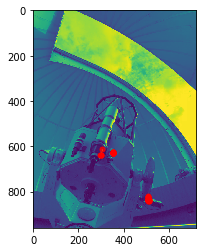

In [33]:
import numpy as np

HarrisCornerDetector(img_1, window_size, height1, width1, offset)
len_bin = get_features(list_x1, list_y1, theta1)
print(len_bin)

## 2.3 Key Point 의 Feature 확인(회전이미지)

In [0]:
import numpy as np2

HarrisCornerDetector(img_2, window_size, height, width, offset)
Bin_Subwindows_2 = get_features(list_x2, list_y2, theta2)
print(len(Bin_Subwindows_2))
print(Bin_Subwindows_2)

#3. Feature-Matching

In [0]:
def feature_matching(Bin_Subwindows1, Bin_Subwindows2):
  for i in range(0, 16):
    for j in range(0, 16):
      for k in range(0,9)
        d = Bin_Subwindows1[i][j][k]- Bin_Subwindows[i][j][k]
  diff.append(d)
  min_diff = min(diff)